# **IBM Hack CHallenge**
## *AI Based Personalized Electronic Product Recommendation System*
## ***Notebook-1: Implementing the Machine Learning models for product recommendation***

### Participants:
1. Atyam V V R Manoj
2. Narra Varsha



### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import operator
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
# importing the pickle library
import pickle
import os

# to ignore warnings
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')


### Importing the pre-processed datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
new_Cell = pd.read_csv(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Pre_Processed Datasets/final_Cell')

In [4]:
new_Cell.head()

,UserID,ProductID,rating,tags
0,A1RCOK89DON3YN,B000B6MY2U,5.0,G r e a t B u y ! ! I t h o u g h t t h i s...
1,A1IDTV3JKFOLVT,B000B6MY2U,4.0,C h a r g e r w o r k s g r e a t T h e c h...
2,A29UBSC2VMDUL4,B00004WINT,5.0,J a w b o n e E a r F i x I f y o u h a v ...
3,A7QCUJOH9CIYR,B00004WINT,5.0,J a b r a g e l s f i t w e l l o n m y ...
4,AX73D8OAWC7TF,B00004WINT,4.0,F i t i s e x e c e l l e n t . U s e d t h...


In [5]:
def user_based_model(df):
  print("Sentimental Analysis on the text")
  df['polarity'] = df['tags'].apply(lambda x: TextBlob(x).sentiment.polarity)
  df['review_len'] = df['tags'].apply(lambda x:len(x))
  df['word_count'] = df['tags'].apply(lambda x: len(x.split()))
  
  
  plt.figure(figsize=(8,6))
  sns.distplot(df['rating']);
  
  plt.figure(figsize=(8,6))
  sns.countplot(df['rating']);

  sns.catplot(x='rating', y='polarity', data=df)

  print(df)

  print("There are ",pd.DataFrame(df.ProductID.value_counts()).shape[0]," unique products in the dataset")
  print("There are ",pd.DataFrame(df.UserID.value_counts()).shape[0]," unique users in the dataset")
  
  df.groupby('ProductID').count()

  print("Number of Ratings for each product:")
  num_rating = df.groupby('ProductID').count()['rating']
  num_rating = pd.DataFrame(num_rating)
  print(num_rating)

  num_rating.rename(columns = {'rating':'num_ratings'},inplace = True)
  num_rating.sort_values(by = 'num_ratings',ascending = False)

  #Computing the average rating of the products
  avg_rating = df.groupby('ProductID').mean()['rating']
  avg_rating = pd.DataFrame(avg_rating)
  print(avg_rating)

  avg_rating.rename(columns = {'rating':'avg_ratings'},inplace = True)
  avg_rating.sort_values(by = 'avg_ratings',ascending = False)

  popular_df = num_rating.merge(avg_rating ,on = 'ProductID')
  print(popular_df)

  # making a limit on the ratings
  popular_df[popular_df['num_ratings']>2]
  x = df.groupby('UserID').count()['rating'] > 3  
  rated_users = x[x].index
  print(rated_users)


  filtered_rating = df[df['UserID'].isin(rated_users)]
  print(filtered_rating)

  y = filtered_rating.groupby('ProductID').count()['rating']>=0
  famous_products = y[y].index
  print(famous_products)

  final_ratings = filtered_rating[filtered_rating['ProductID'].isin(famous_products)]

  pivot_table = final_ratings.pivot_table(index='ProductID',columns='UserID',values='rating')
  pivot_table.fillna(0,inplace = True)
  print("Pivot Table: ")
  print(pivot_table)

  # Implementing the Cosine Similarity function

  print('Applying cosine similarity')

  from sklearn.metrics.pairwise import cosine_similarity
  similarity_scores = cosine_similarity(pivot_table)
  print("Shape of similarity_scores:",similarity_scores.shape)

  sorted(list(enumerate(similarity_scores[70])),key = lambda x:x[1],reverse = True)

  print(similarity_scores)

  return pivot_table,final_ratings,similarity_scores

Sentimental Analysis on the text
               UserID   ProductID  rating  \
0      A1RCOK89DON3YN  B000B6MY2U     5.0   
1      A1IDTV3JKFOLVT  B000B6MY2U     4.0   
2      A29UBSC2VMDUL4  B00004WINT     5.0   
3       A7QCUJOH9CIYR  B00004WINT     5.0   
4       AX73D8OAWC7TF  B00004WINT     4.0   
...               ...         ...     ...   
35362  A1BD4AEN06FFMJ  B0007XCT22     1.0   
35363  A3V6Z4RCDGRC44  B0007XCT22     5.0   
35364   AWTOK5EK2M1BF  B0007XCT22     5.0   
35365   A8XRINNUX92NY  B000MO0JCI     1.0   
35366  A3OJ3U34FSM1PS  B000NIF3CY     2.0   

                                                    tags  polarity  \
0      G r e a t  B u y ! ! I  t h o u g h t  t h i s...    0.0000   
1      C h a r g e r  w o r k s  g r e a t T h e  c h...    0.0000   
2      J a w b o n e  E a r  F i x I f  y o u  h a v ...    0.0000   
3      J a b r a  g e l s  f i t  w e l l  o n  m y  ...    0.0000   
4      F i t  i s  e x e c e l l e n t . U s e d  t h...    0.0000   
...   

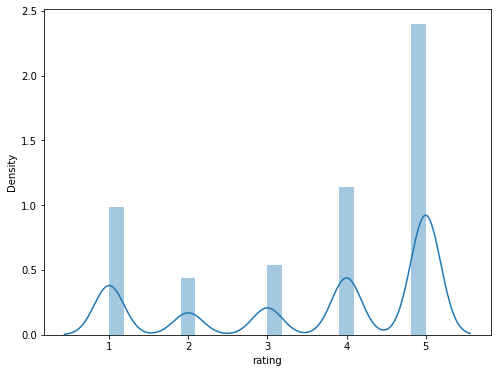

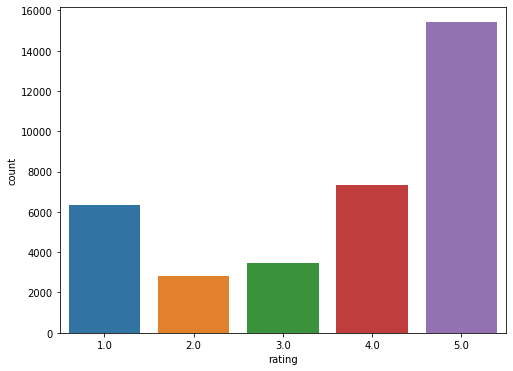

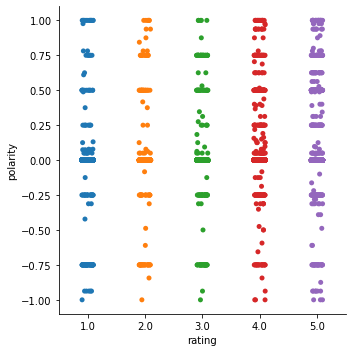

In [6]:
Cell_Pt,Cell_final_ratings,Cell_similarity_scores = user_based_model(new_Cell)

### Converting the variables into pickle files, so they can be used for further analysis

In [14]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Cell_pivot_table.pkl', 'wb') as f:pickle.dump(Cell_Pt,f)

In [8]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Cell_products_dict.pkl', 'wb') as f:pickle.dump(Cell_final_ratings.to_dict(),f)

In [11]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Cell_similarity_scores.pkl', 'wb') as f:pickle.dump(Cell_similarity_scores,f)